In [63]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/bags.csv', header=None)
dataset = np.array(df.values)

In [88]:
N = 25
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=2000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(dataset)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=25, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.855057954788208s


In [89]:
km.cluster_centers_.shape

(25, 1203)

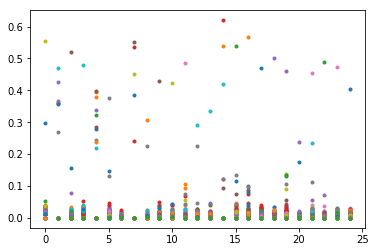

In [90]:
plt.plot(km.cluster_centers_, '.')
plt.show()

In [91]:
km.labels_

array([ 6, 10,  6, ...,  6, 22,  6], dtype=int32)

In [92]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 18:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 18: A deadly bacteria is killing thousands, and it's now in doctor and dentist offices  @elizcohencnn @CDCgov

Cluster 18: What's it like inside the Ebola hotzone? An American doctor who had Ebola is back in Africa

Cluster 18: RT @drsanjaygupta: why you might have to wait longer to see your doctor in 2015:

Cluster 18: RT @drsanjaygupta: meet the doctor and get a first look at the room where ebola patients will be treated in the US.

Cluster 18: These @Uber inspired apps bring the doctor to you

Cluster 18: RT @getpager: The benefits of bringing back house calls: "Uber-inspired apps bring a doctor right to your door"

Cluster 18: When you're sick, the last thing you want to do is get out of bed to see a doctor. These apps bring the doc to you!

Cluster 18: #Ebola doctor in Sierra Leone has died, @msf_field says

Cluster 18: Chief #Ebola doctor in Sierra Leone has the deadly virus, #health officials say

Cluster 18: "It felt like a punch to the gut" Doctor finds signs of #HIV i

In [93]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

In [94]:
silhouette

0.005194852357041755

In [95]:
dataset.shape

(13229, 1203)

In [96]:
closest, distances = pairwise_distances_argmin_min(km.cluster_centers_, dataset)

distance1 = []
# distance2 = []
# distance3 = []
# distance4 = []
# distance5 = []

for i in dataset:
        distance1.append(np.linalg.norm(i - km.cluster_centers_[13]))
#         distance2.append(euclidean(i, km.cluster_centers_[1]))
#         distance3.append(euclidean(i, km.cluster_centers_[2]))
#         distance4.append(euclidean(i, km.cluster_centers_[3]))
#         distance5.append(euclidean(i, km.cluster_centers_[4]))

distance1 = np.asarray(distance1)
# distance2 = np.asarray(distance2)

In [97]:
closest, distances

(array([ 5857,  4605, 12162,    99,  7768,    99,    99,  6307,    99,
           99,    99,    99,    99,    99,  6652,    99,  3311,    99,
         2628,    99,    99,  5869,    99,    99,    99]),
 array([0.4101271 , 0.        , 0.52363698, 0.51754097, 0.        ,
        0.44689962, 0.08305247, 0.        , 0.39025934, 0.45382201,
        0.4469164 , 0.5325794 , 0.38907037, 0.35863671, 0.21037153,
        0.59900801, 0.49723757, 0.49721616, 0.51440791, 0.55991507,
        0.30691879, 0.52946169, 0.50396071, 0.4952181 , 0.42662324]))

In [71]:
print(np.where(distance1 == distance1.min()))
# print(np.where(distance2 == distance2.min()))
# print(distance3.index(min(distance3)))
# print(distance4.index(min(distance4)))
# print(distance5.index(min(distance5)))

(array([ 2628,  9672, 10724, 10931, 11194, 12527]),)


In [70]:
print(min(distance1))
print(euclidean(dataset[2628], km.cluster_centers_[13]))
print(np.linalg.norm(dataset[2628] - km.cluster_centers_[13]))

0.5045137802845819
0.5045137802845819
0.5045137802845819


In [ ]:
print(health_lines[98])

In [ ]:
i = 0
for i in range(dataset.shape[0]):
    pass
print(i)

In [82]:
km.inertia_

12133.347513974413

Fitting kmeans with 1 clusters
Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters
Fitting kmeans with 10 clusters
Fitting kmeans with 11 clusters
Fitting kmeans with 12 clusters
Fitting kmeans with 13 clusters
Fitting kmeans with 14 clusters
Fitting kmeans with 15 clusters
Fitting kmeans with 16 clusters
Fitting kmeans with 17 clusters
Fitting kmeans with 18 clusters
Fitting kmeans with 19 clusters
Fitting kmeans with 20 clusters
Fitting kmeans with 21 clusters
Fitting kmeans with 22 clusters
Fitting kmeans with 23 clusters
Fitting kmeans with 24 clusters
Fitting kmeans with 25 clusters
Fitting kmeans with 26 clusters
Fitting kmeans with 27 clusters
Fitting kmeans with 28 clusters
Fitting kmeans with 29 clusters


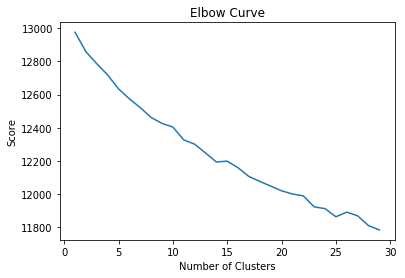

In [86]:
run = True
if run:
    Nc = range(1, 30)

    kmeans = []
    score = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset).inertia_)

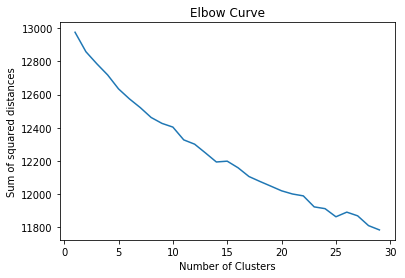

In [87]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()

# Aqui tentei usar o txt para fazer o k-means, mas não terminei

In [ ]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download()

In [ ]:
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(health_lines)
# X = vectorizer.transform(health_lines)

In [ ]:
type(X)

In [ ]:
print(X)

In [ ]:
vectorizer.vocabulary_

In [ ]:
N = 6
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=1000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(X)
print("done in {}s".format(time() - t0))

In [ ]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
#     score.append(kmeans[i].fit(X).score(X))
    score.append(kmeans[i].fit(X).inertia_)

In [ ]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [ ]:
print(km.predict(X[10:20]))